<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Storytelling-of-Sentiment-Analysis" data-toc-modified-id="Data-Storytelling-of-Sentiment-Analysis-1">Data Storytelling of Sentiment Analysis</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Import-necessary-packages" data-toc-modified-id="Import-necessary-packages-1.0.1">Import necessary packages</a></span></li><li><span><a href="#Reading-the-Dataset" data-toc-modified-id="Reading-the-Dataset-1.0.2">Reading the Dataset</a></span></li><li><span><a href="#Examine-the-Dataset" data-toc-modified-id="Examine-the-Dataset-1.0.3">Examine the Dataset</a></span></li><li><span><a href="##-Basic-information-about-Dataset" data-toc-modified-id="#-Basic-information-about-Dataset-1.0.4"># Basic information about Dataset</a></span></li></ul></li><li><span><a href="#Exploratory-Data-Analysis-(EDA)" data-toc-modified-id="Exploratory-Data-Analysis-(EDA)-1.1">Exploratory Data Analysis (EDA)</a></span><ul class="toc-item"><li><span><a href="#Target-Variable" data-toc-modified-id="Target-Variable-1.1.1">Target Variable</a></span></li><li><span><a href="#Fatures" data-toc-modified-id="Fatures-1.1.2">Fatures</a></span><ul class="toc-item"><li><span><a href="#1.-Customer-Feature" data-toc-modified-id="1.-Customer-Feature-1.1.2.1">1. Customer Feature</a></span><ul class="toc-item"><li><span><a href="#How-many-distinct-customers-exist-in-the-dataset?" data-toc-modified-id="How-many-distinct-customers-exist-in-the-dataset?-1.1.2.1.1">How many distinct customers exist in the dataset?</a></span></li><li><span><a href="#How-many-unique-customers-exist-in-each-year?" data-toc-modified-id="How-many-unique-customers-exist-in-each-year?-1.1.2.1.2">How many unique customers exist in each year?</a></span></li><li><span><a href="#How-many-unique-customers-exist-in-each-rating-class?" data-toc-modified-id="How-many-unique-customers-exist-in-each-rating-class?-1.1.2.1.3">How many unique customers exist in each rating class?</a></span></li><li><span><a href="#Who-are-the-first-10-customers-with-most-reviews-and--buying-product?" data-toc-modified-id="Who-are-the-first-10-customers-with-most-reviews-and--buying-product?-1.1.2.1.4">Who are the first 10 customers with most reviews and  buying product?</a></span></li><li><span><a href="#How-many---ratings-are---rated-in-each-rating-class--by-the-first-10-customers-which-bought-most-product-?" data-toc-modified-id="How-many---ratings-are---rated-in-each-rating-class--by-the-first-10-customers-which-bought-most-product-?-1.1.2.1.5">How many   ratings are   rated in each rating class  by the first 10 customers which bought most product ?</a></span></li></ul></li><li><span><a href="#2.-Product-Feature" data-toc-modified-id="2.-Product-Feature-1.1.2.2">2. Product Feature</a></span><ul class="toc-item"><li><span><a href="#How-many-unique-products-exist-in-the-dataset?" data-toc-modified-id="How-many-unique-products-exist-in-the-dataset?-1.1.2.2.1">How many unique products exist in the dataset?</a></span></li><li><span><a href="#How-many-unique-products-exist-in-each-year?" data-toc-modified-id="How-many-unique-products-exist-in-each-year?-1.1.2.2.2">How many unique products exist in each year?</a></span></li><li><span><a href="#What-are-the-first-10-products-with-most-reviews" data-toc-modified-id="What-are-the-first-10-products-with-most-reviews-1.1.2.2.3">What are the first 10 products with most reviews</a></span></li><li><span><a href="#How-many---ratings-are---rated-in-each-rating-class--by-the-first-10-customers-which-bought" data-toc-modified-id="How-many---ratings-are---rated-in-each-rating-class--by-the-first-10-customers-which-bought-1.1.2.2.4">How many   ratings are   rated in each rating class  by the first 10 customers which bought</a></span></li><li><span><a href="#3.-Review-Length-Feature" data-toc-modified-id="3.-Review-Length-Feature-1.1.2.2.5">3. Review Length Feature</a></span></li></ul></li></ul></li></ul></li></ul></li></ul></div>

# Data Storytelling of Sentiment Analysis 

### Import necessary packages

In [1]:
# Dataframe
import pandas as pd

# Array
import numpy as np

# Decompress the file
import gzip

# Visualizations
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

# Datetime
from datetime import datetime

# text preprocessing
import spacy
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize.toktok import ToktokTokenizer
import re
from bs4 import BeautifulSoup
from contractions import CONTRACTION_MAP
import unicodedata
tokenizer = ToktokTokenizer()
nlp = spacy.load('en', parse=True, tag=True, entity=True)
from sklearn.feature_extraction.text import CountVectorizer

## Warnings
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/emineakbulut/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Reading the Dataset

In [2]:
# Read the file
df=pd.read_csv('/Users/emineakbulut/Desktop/capstone project 2/data/cleaned_review_health_and_personal_care.csv')

### Examine the Dataset

In [3]:
# Tail observations of the dataset
df.tail(3)

,customer,product,rating,review_text,pos_feedback,neg_feedback,rating_class,time,year,clean_text,clues
54784,A1Y3FEUELH3FTI,B00LJBMCKK,5.0,"Great Product, Gave extra energy without the j...",0,0,good,2014-07-12,2014,great product give extra energy without jitter...,"['great', 'product', 'give', 'extra', 'energy'..."
54785,A11LC938XF35XN,B00LJBMCKK,5.0,I get lots of energy from this product. I felt...,0,0,good,2014-07-18,2014,get lot energy product feel sluggish slow morn...,"['get', 'lot', 'energy', 'product', 'feel', 's..."
54786,A2I8KUDXTC9WYI,B00LJBMCKK,5.0,I started using this product because it was re...,1,0,good,2014-07-17,2014,start use product recommend dr oz program dr o...,"['start', 'use', 'product', 'recommend', 'dr',..."


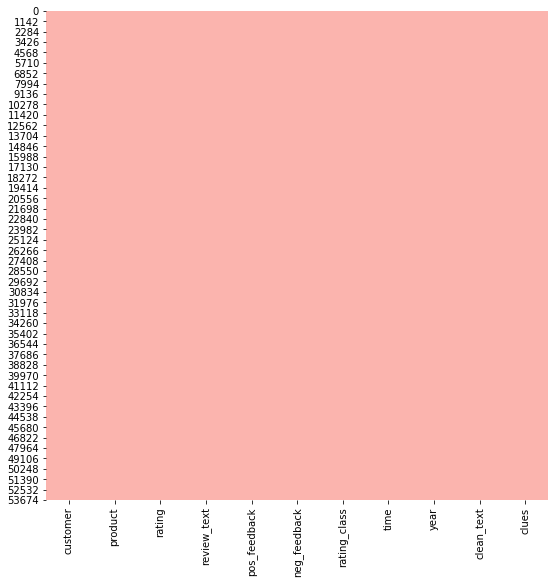

In [4]:
# Check missing value in the dataset
plt.figure(figsize=(9,9))
#sns.set()
ax=sns.heatmap(df.isnull(),cbar=False,cmap='Pastel1')

<font color='green'> 
    
> **There is no missing values.**
 
</font>

### # Basic information about Dataset

In [5]:
# Print the info of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54787 entries, 0 to 54786
Data columns (total 11 columns):
customer        54787 non-null object
product         54787 non-null object
rating          54787 non-null float64
review_text     54787 non-null object
pos_feedback    54787 non-null int64
neg_feedback    54787 non-null int64
rating_class    54787 non-null object
time            54787 non-null object
year            54787 non-null int64
clean_text      54787 non-null object
clues           54787 non-null object
dtypes: float64(1), int64(3), object(7)
memory usage: 4.6+ MB


In [6]:
# Print the describe of the dataset

df.describe()

,rating,pos_feedback,neg_feedback,year
count,54787.000000,54787.000000,54787.000000,54787.000000
mean,4.089492,2.147754,0.524705,2012.370635
std,1.026216,25.584276,2.131750,1.620425
min,1.000000,0.000000,0.000000,2004.000000
25%,4.000000,0.000000,0.000000,2011.000000
50%,4.000000,0.000000,0.000000,2013.000000
75%,5.000000,1.000000,1.000000,2014.000000
max,5.000000,1950.000000,181.000000,2014.000000


## Exploratory Data Analysis (EDA)

### Target Variable

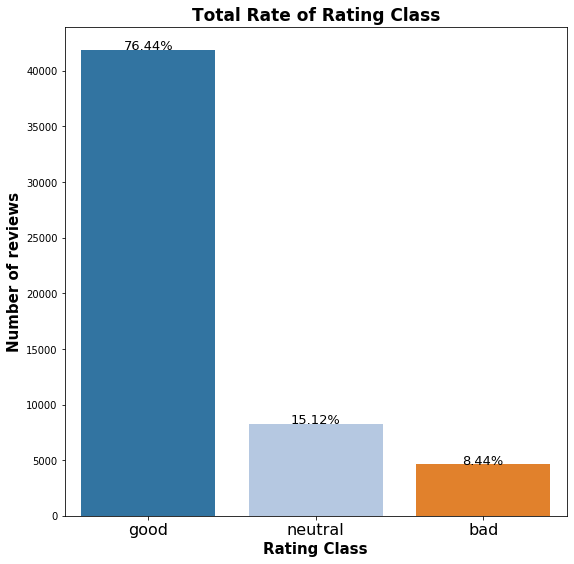

Total Reviews : 54787

Total Rate of Rating Class

good       41879
neutral     8283
bad         4625
Name: rating_class, dtype: int64


In [7]:
#Total rate of Rating Class in the health and personal care reviews from amazon

# Plot the total rate of rating class column
plt.figure(figsize=(9,9))
ax = sns.countplot(x='rating_class',data=df,order=df.rating_class.value_counts().index,palette='tab20')
_  = plt.title('Total Rate of Rating Class', fontsize=17, fontweight='bold')
_  = plt.xticks(fontsize=16)
_  = plt.ylabel('Number of reviews',fontsize=15,fontweight='bold')
_  = plt.xlabel('Rating Class',fontsize=15,fontweight='bold')

# Calculate the percentages of the category
size=[]
total_data = len(df)
for i in ax.patches:
    height = i.get_height()
    ax.text(i.get_x()+i.get_width()/2.,height+0.2,
           '{:1.2f}%'.format(height/total_data*100),ha='center',fontsize=13)
    
# Display the plot
_  = plt.show()



# Total Reviews for each rating class 

print('Total Reviews : {}'.format(len(df.rating_class)))
print('')
print('Total Rate of Rating Class')
print('')
print(df.rating_class.value_counts())


<font color='green'> 

>**There are 54787 reviews and ratings that are wroted for each health and personal care product which they are bought in the Amazon between 2004-2014. This above graph demonstrates most of costumer satisfy with product.**

>**I categorized those 5 rating categories into 3 categories such as good, bad ,and neutral for doing a better sentiment analysis on their reviews. As the graph shows, %76.44 of reviews (41879) are classified as good, %15.12 of reviews(8283) are classified as neutral. %8.44 of reviews(4625) are classified as bad.**
</font>

In [8]:
df_group=df[['year','rating_class']]
df_group=pd.get_dummies(df_group)
df_group['review_text']=df['review_text']
df_group=df_group.groupby('year').agg({'rating_class_bad':['sum'],'rating_class_good':['sum'],
                             'rating_class_neutral':['sum'],'review_text':['size']})



#dff.columns=['_'.join(cols).strip() for cols in dff.columns.values]
df_group=df_group.reset_index()
df_group.columns=['Year','Bad Ratings','Good Ratings',
             'Neutral Ratings','Total Reviews']


df_group

,Year,Bad Ratings,Good Ratings,Neutral Ratings,Total Reviews
0,2004,0.0,2.0,2.0,4
1,2005,2.0,9.0,1.0,12
2,2006,1.0,22.0,3.0,26
3,2007,28.0,351.0,50.0,429
4,2008,125.0,1057.0,233.0,1415
5,2009,270.0,1397.0,382.0,2049
6,2010,430.0,2922.0,664.0,4016
7,2011,508.0,4471.0,891.0,5870
8,2012,696.0,4543.0,1010.0,6249
9,2013,1744.0,15883.0,3375.0,21002


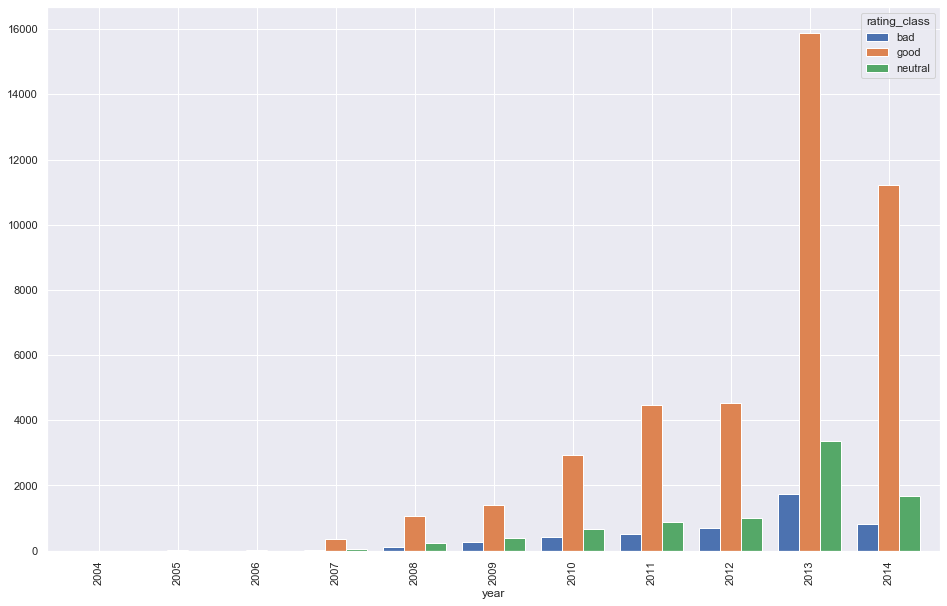

In [9]:
df_pivot=pd.pivot_table(data=df,index='year',columns='rating_class',aggfunc='size',values='review_text')

# Plot total number of rating class for each year
sns.set()
ax=df_pivot.plot(kind='bar',figsize=(16,10),width=0.8)






In [10]:
#df_pivot=df_pivot.reset_index()

plt.figure(figsize=(13,7))


      

#df_pivot=df_pivot.unstack(level=0)
         
#df_pivot.columns()            
            
#pd.DataFrame(df_pivot)  
#df_pivot.unstack(level=0)
df_pivot1=df_pivot.reset_index()
df_pivot1.columns=['year','bad','good','neutral']

<Figure size 936x504 with 0 Axes>

In [11]:
df_pivot1=df_pivot1.set_index('year')



In [12]:
df_pivot1=df_pivot1.stack()


In [13]:
df_pivot1=pd.DataFrame(df_pivot1)
#list(df_pivot1.columns)


In [14]:
#df_pivot1.columns()

In [15]:
#df_pivot1.columns=['year','rating_class','total']

In [16]:
#df_pivot1=pd.melt(df_pivot1,id_vars=['year'],col_level=0,
        value_vars=['bad','good','neutral'],value_name='total',var_name='rating_class')







IndentationError: unexpected indent (<ipython-input-16-c2ac02d40965>, line 2)

In [20]:


df_pivot2=df_pivot1.reset_index()


df_pivot2.columns=['year','rating_class','total']


,year,rating_class,total
0,2004,good,2.0
1,2004,neutral,2.0
2,2005,bad,2.0
3,2005,good,9.0
4,2005,neutral,1.0
5,2006,bad,1.0
6,2006,good,22.0
7,2006,neutral,3.0
8,2007,bad,28.0
9,2007,good,351.0


<Figure size 1296x1440 with 0 Axes>

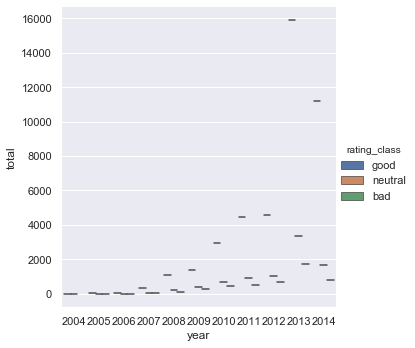

In [26]:
#df_pivot2=df_pivot2.groupby('year').count()
plt.figure(figsize=(18,20))
ax1=sns.catplot(y='total',hue='rating_class',x='year',kind='violin',data=df_pivot2)
      


df_pivot2

### Fatures

#### 1. Customer Feature

##### How many distinct customers exist in the dataset?

In [ ]:
# Check unique number of customer

print('Number of unique customers: {}'.format(df['customer'].nunique()))


##### How many unique customers exist in each year?

In [ ]:
# Calculate number of unique customers in each year
cust=df.groupby('year')['customer'].nunique()


# Set the figure size in order to plot
plt.figure(figsize=(10,5))

# Plot the distibution of unique customers by year
ax = sns.lineplot(x='year',y='customer',data=cust.reset_index(),err_style="bars")

# Add a title
plt.title('Distribution of unique customers by years',fontsize=16,fontweight='bold')

# Display plot
plt.show()


# Print number of unique customers in each year as a dataframe
print(pd.DataFrame(cust))

##### How many unique customers exist in each rating class?

In [ ]:

# Check out total number of reviews for each rating class:
df_ratingclass = pd.DataFrame(df.groupby('rating_class')['review_text'].count().sort_values())


# Check out number of unique customers for each rating class as a list:
number_of_customers = list(df.groupby('rating_class')['customer'].nunique())


# Add list number of unique customers as a to DataFrame df_rr :
df_ratingclass['number_of_customers']=number_of_customers





print(df_ratingclass)



##### Who are the first 10 customers with most reviews and  buying product?

In [ ]:
# Create new dataframe as df1  
df1=df[['customer','review_text','product']][:]

# Groupby with customer column ,sort and find first 10 customer who wrote most reviews
df1.groupby(['customer']).count().sort_values('review_text',ascending=False)[:10]


##### How many   ratings are   rated in each rating class  by the first 10 customers which bought most product ?

In [ ]:
'''Calculate ratings on each rating class 
for the first 10 customers having most reviews through pivot table'''

df_pivot=pd.pivot_table(data=df,index='customer',columns='rating_class',
               values=['rating'],aggfunc=[len])

df_pivot=df_pivot[df_pivot.index.str.contains('A3NHUQ33CFH3VM|A1UQBFCERIP7VJ|A2OCDK0BOW6UCY|ALNFHVS3SC4FV|A2P739KOM4U5JB|A3094EPI56GKZ6|A34BZM6S9L7QI4|AEL6CQNQXONBX|ALQ4USPEQ9L5N|A2ULQOGN59LDNK')]


# Plot ratings of each rating class for first 10 customers having most reviews
sns.set()
plt.figure(figsize=(15,10))
df_pivot.plot(kind='bar')

# Set the tittle and labels
plt.title('The 10 customers rating class rate',fontsize=16,fontweight='bold')
plt.ylabel('Rating',fontsize=13,fontweight='bold')
plt.xlabel(' The 10 customers with most reviews ',fontsize=13,fontweight='bold')

# Display plot
plt.show()



# Print number of ratings on each rating class the first 10 customers having most reviews
print(df_pivot)

#### 2. Product Feature

##### How many unique products exist in the dataset?

In [ ]:
# Print number of unique product in the dataset

print('Number of unique health and personalcare products : {}'.format(df['product'].nunique()))

##### How many unique products exist in each year?

In [ ]:
# Check out number of unique products in each year
prod = df.groupby('year')['product'].nunique()
prod=pd.DataFrame(prod)

# Plot number of unique products in each year
plt.figure(figsize=(10,7))
sns.catplot(x='year',y='product',data=prod.reset_index(), palette="ch:.25",kind='bar')

# Set title and xticks
plt.title('Number of unique products in each year',fontsize=13,fontweight='bold')
plt.xticks(rotation=90)

# Display plot
plt.show()

print(prod)

##### What are the first 10 products with most reviews

In [ ]:
# Create new dataframe as df1  
df_p=df[['review_text','product']][:]

# Groupby with customer column ,sort and find first 10 customer who wrote most reviews
df_p.groupby(['product']).count().sort_values('review_text',ascending=False)[:10]



##### How many   ratings are   rated in each rating class  by the first 10 customers which bought 

In [ ]:
'''Calculate ratings on each rating class 
for the first 10 products having most reviews through pivot table'''

df_prod_pivot=pd.pivot_table(data=df,index='product',columns='rating_class',
               values=['rating'],aggfunc=[len])

df_prod_pivot=df_prod_pivot[df_prod_pivot.index.str.contains('B0037KMI0U|B001F51VRK|B001F51VS4|B003X5FYJQ|B0013OQGO6|B007LEO4Y6|B006DR2BEW|B0013OX9NC|B0072DAZEE|B00GY2AY18')]


# Plot ratings of each rating class for first 10 products having most reviews
sns.set()
plt.figure(figsize=(13,7))
df_prod_pivot.plot(kind='bar')

# Set the tittle and labels
plt.title('The 10 products rating class rate',fontsize=16,fontweight='bold')
plt.ylabel('Rating',fontsize=13,fontweight='bold')
plt.xlabel(' The 10 products with most reviews ',fontsize=13,fontweight='bold')

# Display plot
plt.show()



# Print number of ratings on each rating class the first 10 products having most reviews
print(df_prod_pivot)

##### 3. Review Length Feature